In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
print(colored('\nLibraries loaded successfully.', 'green'))


Libraries loaded successfully.


In [ ]:

# Configure pandas and seaborn settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_style('whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

print(colored('\nSettings configured.', 'green'))


Settings configured.


In [ ]:
# Load the dataset
data = pd.read_csv('water_potability.csv')
print(data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
# Data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [ ]:

# Summary statistics
summary_stats = data.describe().T
print(summary_stats)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

In [ ]:
# Data columns
print("\nData columns:")
for i, col in enumerate(data.columns):
    print(f"{i}: {col}")


Data columns:
0: ph
1: Hardness
2: Solids
3: Chloramines
4: Sulfate
5: Conductivity
6: Organic_carbon
7: Trihalomethanes
8: Turbidity
9: Potability


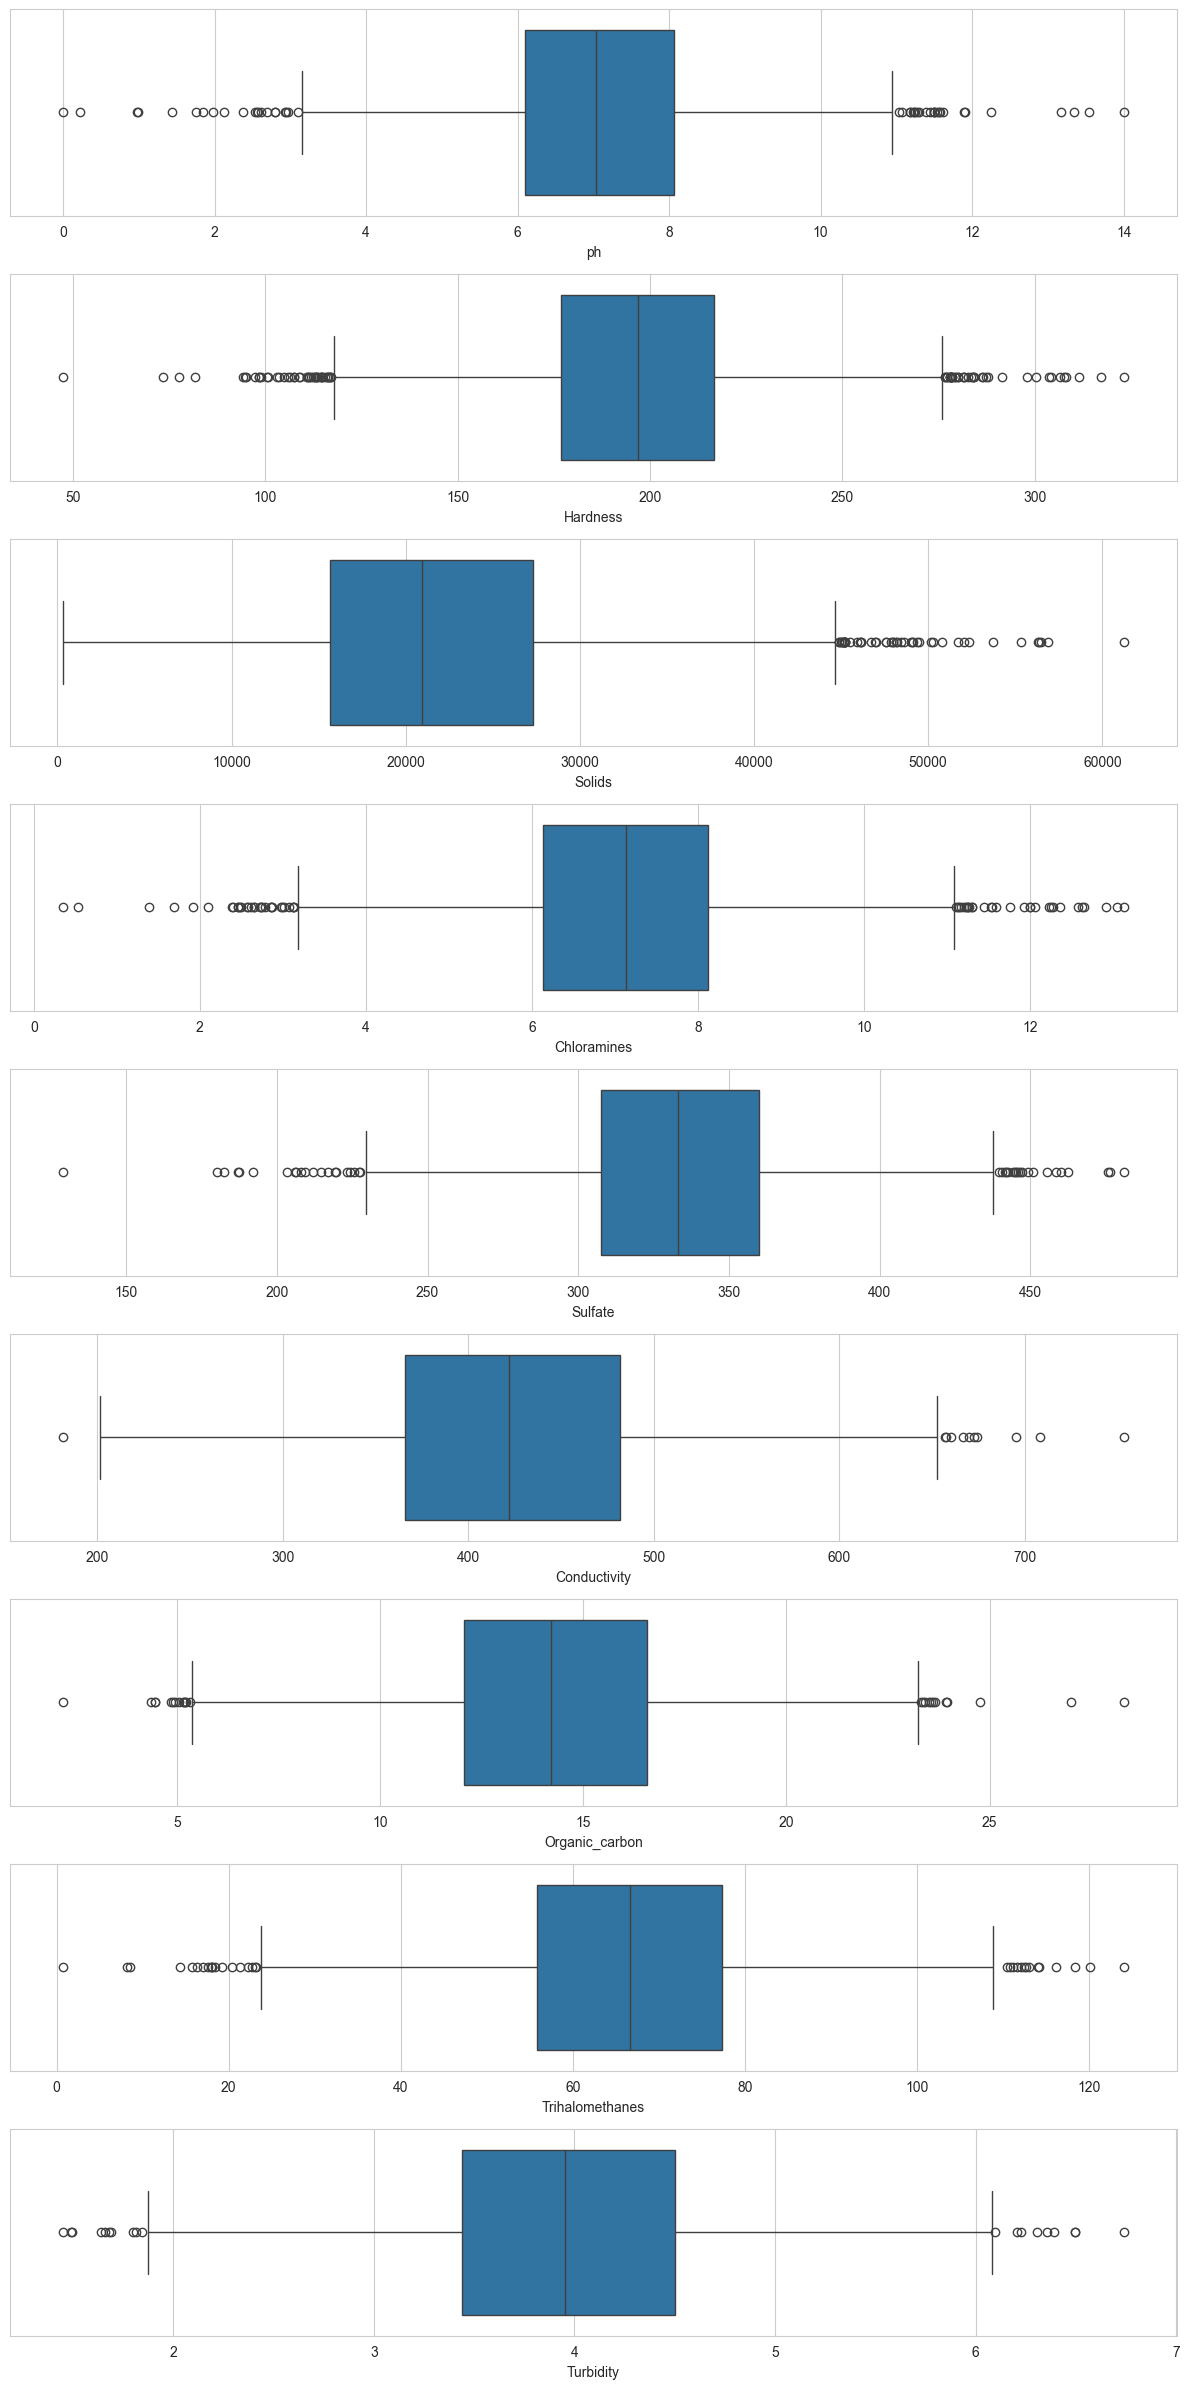

In [ ]:
# Visualize data distribution
fig, axes = plt.subplots(9, 1, figsize=(12, 24), tight_layout=True)
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(ax=axes[i], x=data[col])
plt.show()

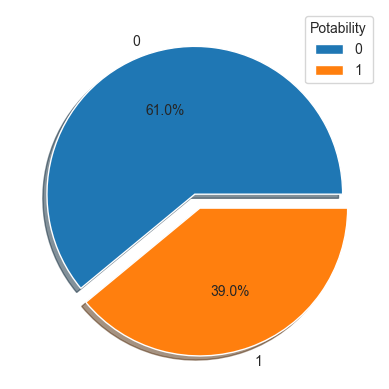

In [ ]:
# Potability distribution
potability_counts = data['Potability'].value_counts()
plt.pie(potability_counts, labels=potability_counts.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.legend(title='Potability')
plt.show()

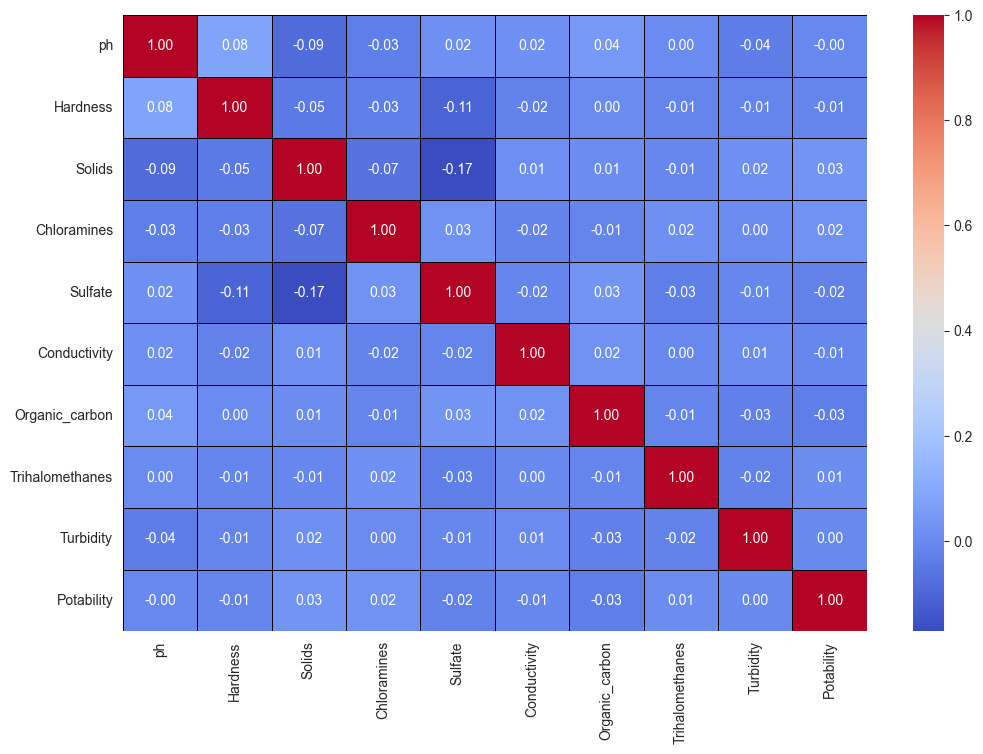

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

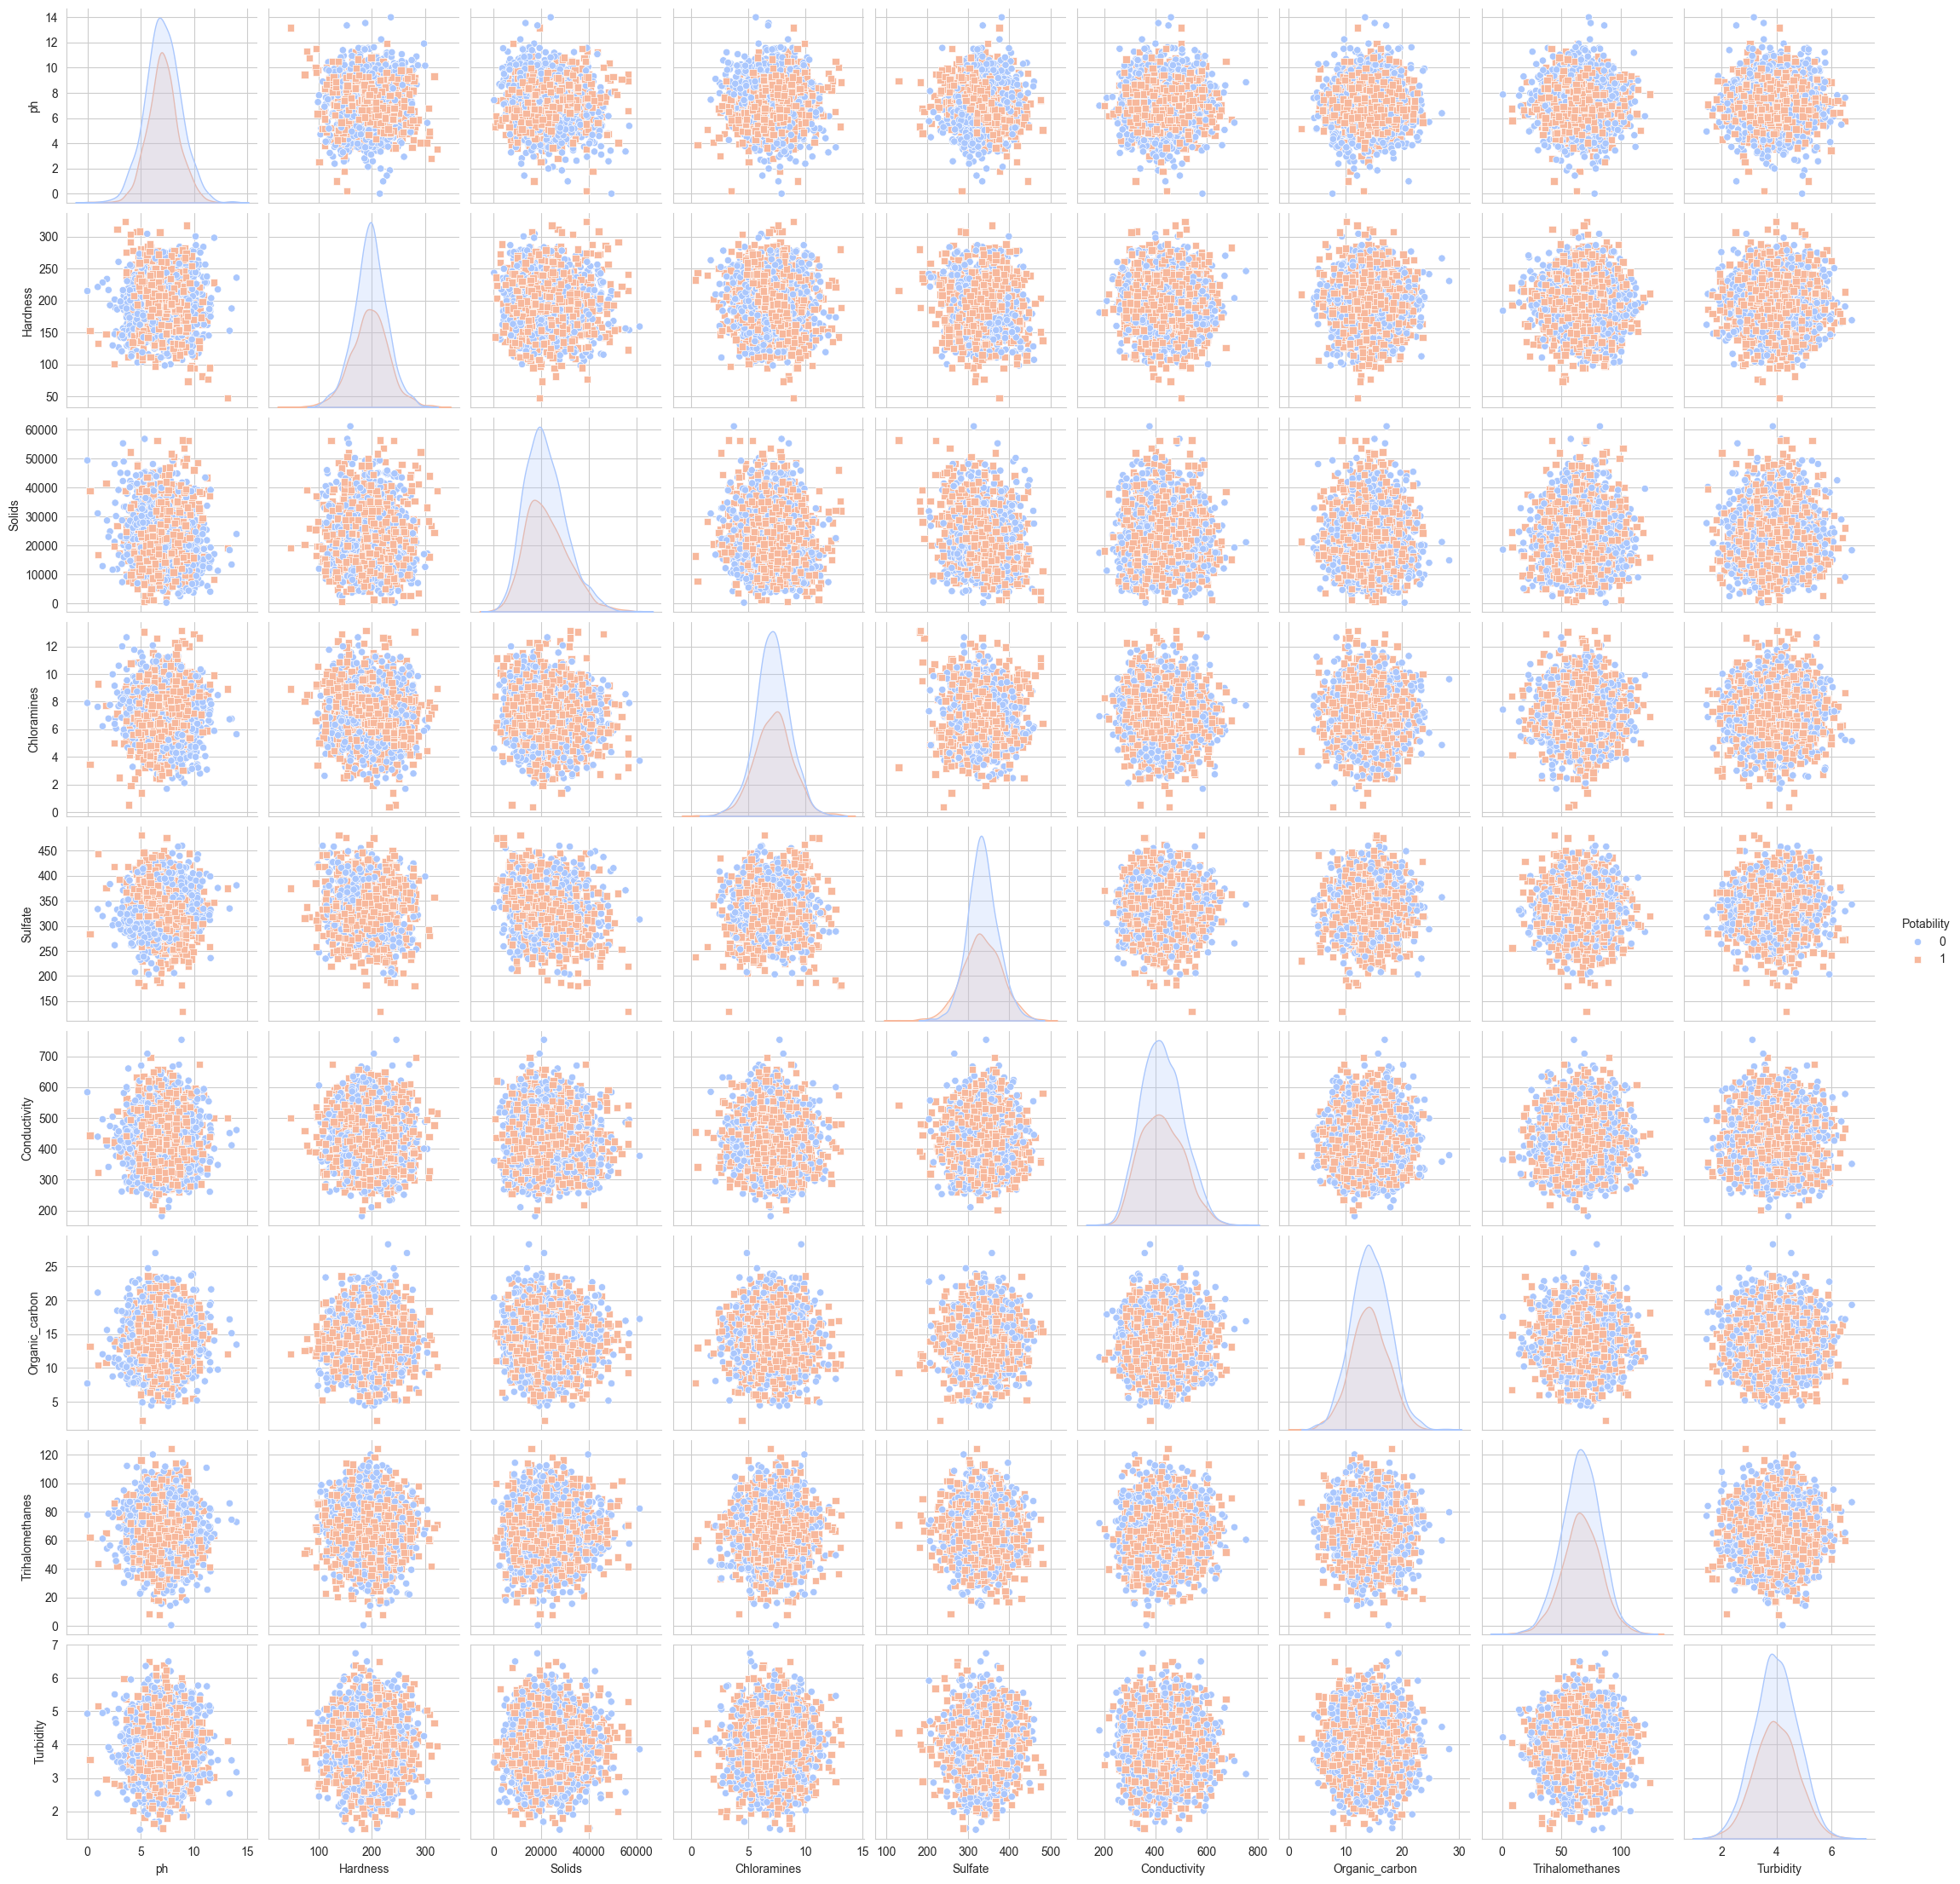

In [ ]:
# Pairplot
sns.pairplot(data, hue='Potability', palette='coolwarm', diag_kind='kde', markers=["o", "s"])
plt.show()

In [ ]:
# Handle missing values
data.fillna(data.median(), inplace=True)
print("\nMissing values filled with median.")


Missing values filled with median.


In [ ]:
# Define features and target
X = data.drop(columns=['Potability'])
y = data['Potability']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Function to plot results
def plot_results(y_true, y_pred, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    cm = metrics.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
    axes[0].set_title(f'{model_name} - Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    cr = metrics.classification_report(y_true, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title(f'{model_name} - Classification Report')
    plt.show()

Logistic Regression best params: {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Logistic Regression accuracy: 0.628


c:\Users\Yusuf Olororo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yusuf Olororo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yusuf Olororo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

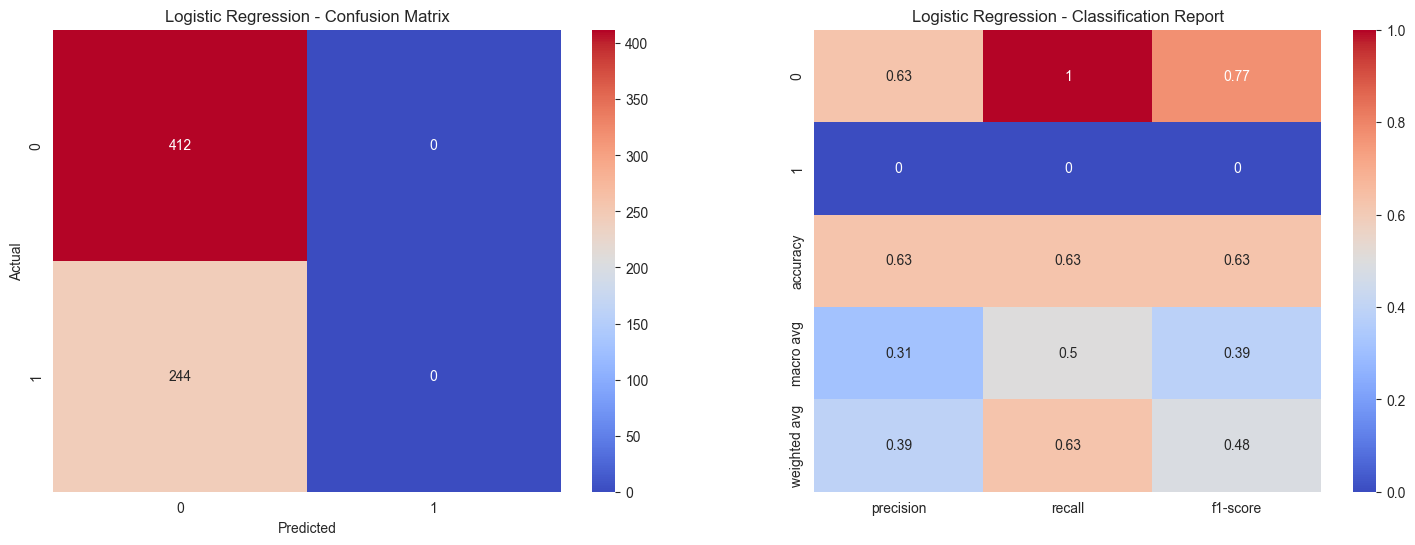

In [ ]:
# Logistic Regression
lr_params = {'C': [0.001, 1, 1000], 'solver': ['liblinear', 'saga'], 'class_weight': ['balanced', None]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test)
print(colored(f'Logistic Regression best params: {lr_grid.best_params_}', 'blue'))
print(colored(f'Logistic Regression accuracy: {metrics.accuracy_score(y_test, lr_pred):.3f}', 'green'))
plot_results(y_test, lr_pred, 'Logistic Regression')

In [ ]:

# Random Forest
rf_params = {'n_estimators': [100, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
print(colored(f'Random Forest best params: {rf_grid.best_params_}', 'blue'))
print(colored(f'Random Forest accuracy: {metrics.accuracy_score(y_test, rf_pred):.3f}', 'green'))
plot_results(y_test, rf_pred, 'Random Forest')


In [ ]:
# MLP Classifier
mlp_params = {'hidden_layer_sizes': [(100,), (500,)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=1000), mlp_params, cv=5)
mlp_grid.fit(X_train, y_train)
mlp_best = mlp_grid.best_estimator_
mlp_pred = mlp_best.predict(X_test)
print(colored(f'MLP best params: {mlp_grid.best_params_}', 'blue'))
print(colored(f'MLP accuracy: {metrics.accuracy_score(y_test, mlp_pred):.3f}', 'green'))
plot_results(y_test, mlp_pred, 'MLP Classifier')

In [ ]:
# K-Nearest Neighbors
knn_params = {'n_neighbors': list(range(3, 51, 2)), 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)
print(colored(f'KNN best params: {knn_grid.best_params_}', 'blue'))
print(colored(f'KNN accuracy: {metrics.accuracy_score(y_test, knn_pred):.3f}', 'green'))
plot_results(y_test, knn_pred, 'KNN')

In [ ]:
# Comparative analysis
results_df = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'MLP Classifier'],
    'Accuracy': [metrics.accuracy_score(y_test, rf_pred), 
                 metrics.accuracy_score(y_test, lr_pred), 
                 metrics.accuracy_score(y_test, knn_pred), 
                 metrics.accuracy_score(y_test, mlp_pred)]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=results_df, palette='coolwarm')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.6, 0.7)
plt.show()